In [ ]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')
#Loading the Dataset

import pandas as pd

path = '/content/drive/MyDrive/Random forest SVM Decision trees/data.txt'
df = pd.read_csv(path,sep=',')
df.columns = ['0', '1', '2', '3', '4','5','6','7','8','9','10','11','12','13','target_class']
df.head()
inputs=df.drop('target_class',axis='columns')

Mounted at /content/drive


In [ ]:
df['mean']=inputs.mean(axis=1)
df['min'] = inputs.min(axis=1)
df['max']=inputs.max(axis=1)
df['stddev']=inputs.std(axis=1)
df['skew']=inputs.skew(axis=1)
df['kurtosis']=inputs.kurtosis(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target_class,mean,min,max,stddev,skew,kurtosis
0,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0,4312.748571,4004.62,4638.97,193.848817,0.516201,-0.404560
1,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0,4312.160714,4006.67,4630.26,191.577798,0.498363,-0.434202
2,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0,4316.227143,4011.79,4632.31,190.543938,0.475085,-0.438601
3,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0,4316.190000,4011.79,4632.82,191.157855,0.466112,-0.467151
4,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,0,4310.732143,4004.62,4628.21,190.916744,0.473246,-0.456949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14974,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1,4291.538571,3990.26,4625.64,197.914372,0.612271,-0.387546
14975,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1,4287.508571,3991.79,4621.54,198.327195,0.644776,-0.400887
14976,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1,4287.838571,3990.77,4623.59,199.105595,0.641817,-0.415883
14977,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1,4293.552857,3991.79,4628.72,198.490982,0.616735,-0.410967


In [ ]:
inputs_n=df.drop(['0', '1', '2', '3', '4','5','6','7','8','9','10','11','12','13'],axis='columns')
print(inputs_n)
df0=inputs_n[df.target_class==0]
df1=inputs_n[df.target_class==1]
len_df0=len(df0)
len_df1=len(df1)
print('len_df0',len_df0)
print('len_df1',len_df1)

       target_class         mean      min  ...      stddev      skew  kurtosis
0                 0  4312.748571  4004.62  ...  193.848817  0.516201 -0.404560
1                 0  4312.160714  4006.67  ...  191.577798  0.498363 -0.434202
2                 0  4316.227143  4011.79  ...  190.543938  0.475085 -0.438601
3                 0  4316.190000  4011.79  ...  191.157855  0.466112 -0.467151
4                 0  4310.732143  4004.62  ...  190.916744  0.473246 -0.456949
...             ...          ...      ...  ...         ...       ...       ...
14974             1  4291.538571  3990.26  ...  197.914372  0.612271 -0.387546
14975             1  4287.508571  3991.79  ...  198.327195  0.644776 -0.400887
14976             1  4287.838571  3990.77  ...  199.105595  0.641817 -0.415883
14977             1  4293.552857  3991.79  ...  198.490982  0.616735 -0.410967
14978             1  4298.059286  3997.44  ...  197.732176  0.623356 -0.379600

[14979 rows x 7 columns]
len_df0 8256
len_df1 6723


In [ ]:
df0.head()

,target_class,mean,min,max,stddev,skew,kurtosis
0,0,4312.748571,4004.62,4638.97,193.848817,0.516201,-0.404560
1,0,4312.160714,4006.67,4630.26,191.577798,0.498363,-0.434202
2,0,4316.227143,4011.79,4632.31,190.543938,0.475085,-0.438601
3,0,4316.190000,4011.79,4632.82,191.157855,0.466112,-0.467151
4,0,4310.732143,4004.62,4628.21,190.916744,0.473246,-0.456949


In [ ]:
df1.head()

,target_class,mean,min,max,stddev,skew,kurtosis
187,1,4359.560714,4017.95,4810.26,225.163058,0.411502,-0.298664
188,1,4356.630000,4005.64,4811.28,227.065620,0.390828,-0.258577
189,1,4346.812857,3998.46,4795.90,226.377595,0.388237,-0.332752
190,1,4338.756429,3990.26,4783.59,225.591861,0.372586,-0.384140
191,1,4338.388571,3987.69,4784.10,225.006687,0.359757,-0.363043


In [ ]:
maxstddev=df0['stddev']
disp_maxstddev=maxstddev.max()
print('maxstddev',disp_maxstddev)
maxskew=df0['skew']
disp_maxskew=maxskew.max()
print('maxskew',disp_maxskew)

maxstddev 216945.44567159528
maxskew 2.794741862457252


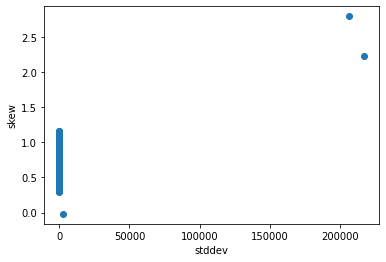

In [ ]:
from matplotlib import pyplot as plt
plt.xlabel('stddev')
plt.ylabel('skew')
plt.scatter(df0['stddev'],df0['skew'])

In [ ]:
#Test-Train Split
#split dataset in statistical features and target variable
feature_cols = ['mean', 'min', 'max', 'stddev','kurtosis','skew']
X = inputs_n[feature_cols] # Features
y = df['target_class'] # Target variable
print(X)

              mean      min      max      stddev  kurtosis      skew
0      4312.748571  4004.62  4638.97  193.848817 -0.404560  0.516201
1      4312.160714  4006.67  4630.26  191.577798 -0.434202  0.498363
2      4316.227143  4011.79  4632.31  190.543938 -0.438601  0.475085
3      4316.190000  4011.79  4632.82  191.157855 -0.467151  0.466112
4      4310.732143  4004.62  4628.21  190.916744 -0.456949  0.473246
...            ...      ...      ...         ...       ...       ...
14974  4291.538571  3990.26  4625.64  197.914372 -0.387546  0.612271
14975  4287.508571  3991.79  4621.54  198.327195 -0.400887  0.644776
14976  4287.838571  3990.77  4623.59  199.105595 -0.415883  0.641817
14977  4293.552857  3991.79  4628.72  198.490982 -0.410967  0.616735
14978  4298.059286  3997.44  4638.46  197.732176 -0.379600  0.623356

[14979 rows x 6 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 90% training and 10% test
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (13481, 6)
X_test (1498, 6)
y_train (13481,)
y_test (1498,)


In [ ]:
len(X_train)

13481

In [ ]:
len(X_test)

1498

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
print('Accuracy',svclassifier.score(X_test,y_test))

Accuracy 0.5787716955941254


In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[601 212]
 [419 266]]
              precision    recall  f1-score   support

           0       0.59      0.74      0.66       813
           1       0.56      0.39      0.46       685

    accuracy                           0.58      1498
   macro avg       0.57      0.56      0.56      1498
weighted avg       0.57      0.58      0.57      1498



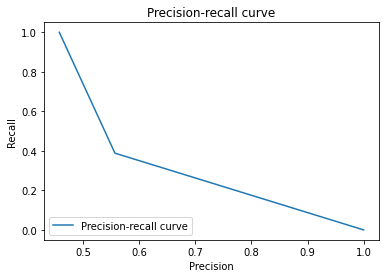

In [ ]:
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

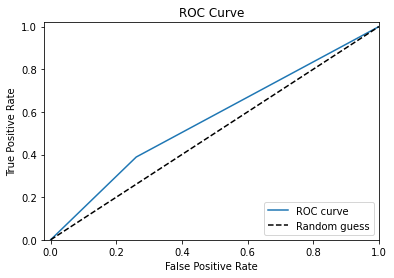

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")